In [1]:
import yfinance
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import ar_select_order

In [2]:
# Make all the plots bigger
plt.rcParams["figure.figsize"] = [10, 5]

In [3]:
amzn = yfinance.Ticker('AMZN')

In [4]:
amzn_history = amzn.history(start='1997-05-15')
amzn_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000,0,0.0
1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000,0,0.0
1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800,0,0.0
1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200,0,0.0
1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200,0,0.0
...,...,...,...,...,...,...,...
2021-10-20,3452.659912,3462.860107,3400.370117,3415.060059,2139800,0,0.0
2021-10-21,3414.250000,3440.280029,3403.000000,3435.010010,1881400,0,0.0
2021-10-22,3421.000000,3429.840088,3331.300049,3335.550049,3133800,0,0.0


<AxesSubplot:xlabel='Date'>

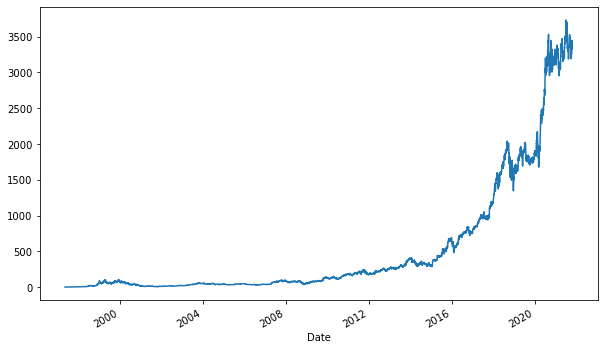

In [5]:
amzn_history['Close'].plot(figsize=(10,6))

In [6]:
amzn_history_close = amzn_history['Close']
amzn_history_close

Date
1997-05-15       1.958333
1997-05-16       1.729167
1997-05-19       1.708333
1997-05-20       1.635417
1997-05-21       1.427083
                 ...     
2021-10-20    3415.060059
2021-10-21    3435.010010
2021-10-22    3335.550049
2021-10-25    3320.370117
2021-10-26    3373.989990
Name: Close, Length: 6154, dtype: float64

In [7]:
business_day_range = pd.date_range(start='1997-05-15', end='2021-05-07', freq='B')

In [8]:
business_day_range

DatetimeIndex(['1997-05-15', '1997-05-16', '1997-05-19', '1997-05-20',
               '1997-05-21', '1997-05-22', '1997-05-23', '1997-05-26',
               '1997-05-27', '1997-05-28',
               ...
               '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29',
               '2021-04-30', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07'],
              dtype='datetime64[ns]', length=6257, freq='B')

In [9]:
# Get a value for every business day
amzn_history_close = amzn_history_close.reindex(business_day_range)
amzn_history_close

1997-05-15       1.958333
1997-05-16       1.729167
1997-05-19       1.708333
1997-05-20       1.635417
1997-05-21       1.427083
                 ...     
2021-05-03    3386.489990
2021-05-04    3311.870117
2021-05-05    3270.540039
2021-05-06    3306.370117
2021-05-07    3291.610107
Freq: B, Name: Close, Length: 6257, dtype: float64

In [10]:
# Interpolate any missing values
amzn_history_close.fillna(method='ffill', inplace=True)
amzn_history_close

1997-05-15       1.958333
1997-05-16       1.729167
1997-05-19       1.708333
1997-05-20       1.635417
1997-05-21       1.427083
                 ...     
2021-05-03    3386.489990
2021-05-04    3311.870117
2021-05-05    3270.540039
2021-05-06    3306.370117
2021-05-07    3291.610107
Freq: B, Name: Close, Length: 6257, dtype: float64

In [11]:
amzn_history_close.index

DatetimeIndex(['1997-05-15', '1997-05-16', '1997-05-19', '1997-05-20',
               '1997-05-21', '1997-05-22', '1997-05-23', '1997-05-26',
               '1997-05-27', '1997-05-28',
               ...
               '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29',
               '2021-04-30', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07'],
              dtype='datetime64[ns]', length=6257, freq='B')

In [12]:
amzn.options

('2021-10-29',
 '2021-11-05',
 '2021-11-12',
 '2021-11-19',
 '2021-11-26',
 '2021-12-03',
 '2021-12-17',
 '2022-01-21',
 '2022-02-18',
 '2022-03-18',
 '2022-04-14',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16',
 '2024-01-19')

In [13]:
amzn_option_chain = amzn.option_chain('2022-06-17')

In [14]:
calls = amzn_option_chain.calls
calls.sort_values(by=['strike'], ascending=False, inplace=True)
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
170,AMZN220617C05500000,2021-10-26 16:45:16,5500.0,8.18,7.80,8.60,0.960001,13.296407,25.0,436,0.302909,False,REGULAR,USD
169,AMZN220617C05400000,2021-10-25 17:34:00,5400.0,7.87,8.90,9.55,0.000000,0.000000,50.0,195,0.298660,False,REGULAR,USD
168,AMZN220617C05300000,2021-10-25 17:33:40,5300.0,10.50,10.00,10.75,1.600000,17.977531,7.0,2986,0.294822,False,REGULAR,USD
167,AMZN220617C05250000,2021-10-04 18:09:51,5250.0,8.14,10.60,11.45,0.000000,0.000000,3.0,278,0.293006,False,REGULAR,USD
166,AMZN220617C05200000,2021-10-26 14:36:35,5200.0,12.60,11.30,12.10,2.400001,23.529419,2.0,707,0.290733,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,AMZN220617C01420000,2021-08-19 17:28:47,1420.0,1796.97,2045.05,2057.45,0.000000,0.000000,2.0,201,0.936639,True,REGULAR,USD
3,AMZN220617C01400000,2021-08-17 17:11:53,1400.0,1846.79,2064.75,2077.10,0.000000,0.000000,2.0,0,0.948784,True,REGULAR,USD
2,AMZN220617C01380000,2021-08-25 21:20:13,1380.0,1916.88,2050.75,2061.35,0.000000,0.000000,2.0,335,0.846689,True,REGULAR,USD
1,AMZN220617C01360000,2021-08-25 21:20:12,1360.0,1960.78,2070.45,2081.05,0.000000,0.000000,44.0,260,0.857675,True,REGULAR,USD


In [15]:
amzn_long_call = calls.iloc[51]
amzn_long_call

contractSymbol       AMZN220617C03370000
lastTradeDate        2021-10-25 18:22:25
strike                            3370.0
lastPrice                         303.55
bid                               293.75
ask                               297.75
change                         31.349976
percentChange                  11.517258
volume                               2.0
openInterest                          31
impliedVolatility               0.274456
inTheMoney                          True
contractSize                     REGULAR
currency                             USD
Name: 119, dtype: object

In [16]:
amzn_long_call_ask = amzn_long_call['ask']
amzn_long_call_ask

297.75

In [17]:
amzn_long_call_strike = amzn_long_call['strike']
amzn_long_call_strike

3370.0

In [18]:
amzn_short_call = calls.iloc[0]
amzn_short_call

contractSymbol       AMZN220617C05500000
lastTradeDate        2021-10-26 16:45:16
strike                            5500.0
lastPrice                           8.18
bid                                  7.8
ask                                  8.6
change                          0.960001
percentChange                  13.296407
volume                              25.0
openInterest                         436
impliedVolatility               0.302909
inTheMoney                         False
contractSize                     REGULAR
currency                             USD
Name: 170, dtype: object

In [19]:
amzn_short_call_bid = amzn_short_call['bid']
amzn_short_call_bid

7.8

In [20]:
amzn_short_call_strike = amzn_short_call['strike']
amzn_short_call_strike

5500.0

In [21]:
mod = ar_select_order(amzn_history_close, maxlag=30, old_names=True)

In [22]:
amzn_model = mod.model
amzn_model_results = amzn_model.fit()
amzn_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Close   No. Observations:                 6257
Model:                    AutoReg(27)   Log Likelihood              -26487.861
Method:               Conditional MLE   S.D. of innovations             16.992
Date:                Tue, 26 Oct 2021   AIC                              5.675
Time:                        14:01:14   BIC                              5.706
Sample:                    06-23-1997   HQIC                             5.686
                         - 05-07-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1200      0.252      0.476      0.634      -0.374       0.614
Close.L1       0.9482      0.013     75.078      0.000       0.923       0.973
Close.L2       0.0272      0.017      1.564      0.118      -0.007       0.061
Close.L3      -0.0407      0.017     -2.343      0.019      -0.075      -0.007
Close.L4       0.0750      0.017      4.324      0.000       0.041       0.109
Close.L5      -0.0256      0.017     -1.471      0.141      -0.060       0.008
Close.L6       0.0097      0.017      0.557      0.578      -0.024       0.044
Close.L7       0.0360      0.017      2.075      0.038       0.002       0.070
Close.L8      -0.0444      0.017     -2.560      0.010      -0.078      -0.010
Close.L9       0.0792      0.017      4.556      0.000       0.045       0.113
Close.L10     -0.1184      0.017     -6.803      0.000      -0.153      -0.084
Close.L11      0.0476      0.017      2.723      0.006       0.013       0.082
Close.L12      0.0030      0.017      0.170      0.865      -0.031       0.037
Close.L13     -0.0889      0.018     -5.077      0.000      -0.123      -0.055
Close.L14      0.1003      0.018      5.732      0.000       0.066       0.135
Close.L15     -0.0400      0.018     -2.283      0.022      -0.074      -0.006
Close.L16     -0.0111      0.018     -0.636      0.525      -0.045       0.023
Close.L17      0.0498      0.018      2.843      0.004       0.015       0.084
Close.L18      0.0279      0.017      1.598      0.110      -0.006       0.062
Close.L19      0.0150      0.017      0.858      0.391      -0.019       0.049
Close.L20     -0.0460      0.017     -2.633      0.008      -0.080      -0.012
Close.L21     -0.0567      0.017     -3.244      0.001      -0.091      -0.022
Close.L22      0.0476      0.018      2.722      0.006       0.013       0.082
Close.L23     -0.0046      0.018     -0.265      0.791      -0.039       0.030
Close.L24     -0.0634      0.018     -3.625      0.000      -0.098      -0.029
Close.L25      0.0987      0.018      5.635      0.000       0.064       0.133
Close.L26     -0.1059      0.018     -6.030      0.000      -0.140      -0.072
Close.L27      0.0819      0.013      6.387      0.000       0.057       0.107
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0701           -0.1313j            1.0781           -0.4806
AR.2            -1.0701           +0.1313j            1.0781            0.4806
AR.3            -0.9880           -0.3863j            1.0608           -0.4407
AR.4            -0.9880           +0.3863j            1.0608            0.4407
AR.5            -0.8975           -0.6090j            1.0846           -0.4051
AR.6            -0.8975           +0.6090j            1.0846            0.4051
AR

In [23]:
# Statistical moments of underlying
amzn_history_close.loc['2020-04-15':].describe()

count     278.000000
mean     3050.667657
std       311.667149
min      2286.040039
25%      3004.609985
50%      3145.509888
75%      3259.592468
max      3531.449951
Name: Close, dtype: float64

In [24]:
dir(amzn_model_results)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ar_lags',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_df_model',
 '_get_robustcov_results',
 '_hold_back',
 '_lag_repr',
 '_max_lag',
 '_n_totobs',
 '_nobs',
 '_params',
 '_use_t',
 'aic',
 'ar_lags',
 'arfreq',
 'bic',
 'bse',
 'conf_int',
 'cov_params',
 'cov_params_default',
 'data',
 'df_model',
 'df_resid',
 'diagnostic_summary',
 'f_test',
 'fittedvalues',
 'forecast',
 'fpe',
 'get_prediction',
 'hqic',
 'initialize',
 'llf',
 'load',
 'model',
 'nobs',
 'normalized_cov_params',
 'params',
 'plot_diagnostics',
 'plot_predict',
 'predict',
 'pvalues',
 'remove_data',
 'resid',
 'roots',
 'save',
 'scale',
 'si

In [25]:
amzn_model_results.resid

1997-06-23    -0.167720
1997-06-24    -0.115112
1997-06-25    -0.118240
1997-06-26    -0.125087
1997-06-27    -0.148801
                ...    
2021-05-03   -84.096570
2021-05-04   -76.594412
2021-05-05   -49.263849
2021-05-06    15.439809
2021-05-07   -16.325000
Freq: B, Length: 6230, dtype: float64

In [26]:
def bull_call_spread_strategy(spot_at_expiration, spot_now, premium_short, premium_long, 
                          strike_short, strike_long):
    if spot_at_expiration > strike_short:
        payoff_short_call = premium_short - (spot_at_expiration - strike_short)
    else:
        payoff_short_call = premium_short
    if spot_at_expiration > strike_long:
        payoff_long_call = (spot_at_expiration - strike_long) - premium_long
    else:
        payoff_long_call = - premium_long
    return payoff_long_call + payoff_short_call

In [27]:
# Begin sampling of errors, estimate model, generate forecast
amzn_forecasts = {}
amzn_payoffs = {}
for it in range(1000):
    error_sample = amzn_model_results.resid.sample(frac=1)
    error_sample.index = amzn_history_close.index[-len(error_sample.index):]
    amzn_new_sample = (amzn_history_close + error_sample).dropna()
    new_amzn_ar_model = ar_select_order(
        amzn_new_sample, 
        maxlag=30, 
        old_names=True
    )
    model = new_amzn_ar_model.model.fit()
    new_forecast = model.predict(start='2021-05-10', end='2022-06-17')
    amzn_forecasts[it] = pd.concat(
        [
            amzn_history_close.loc['2021-04-7':'2021-05-7'], 
            new_forecast
        ], axis=0
    )
    amzn_payoffs[it] = bull_call_spread_strategy(
        spot_at_expiration = new_forecast.loc['2022-06-17'],
        spot_now = amzn_history_close.loc['2021-05-07'],
        premium_short = amzn_short_call_bid,
        premium_long = amzn_long_call_ask,
        strike_short = amzn_short_call_strike,
        strike_long = amzn_long_call_strike
    )
    print(it)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [28]:
type(amzn_forecasts)
amzn_forecasts.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [29]:
# Get all simulations into a DF
all_sims_df = pd.DataFrame(amzn_forecasts)
all_sims_df.loc['2022-06-17'].describe()

count    1000.000000
mean     4279.750653
std        35.332602
min      4013.880140
25%      4262.500529
50%      4280.269931
75%      4290.437798
max      4596.597431
Name: 2022-06-17 00:00:00, dtype: float64

<AxesSubplot:>

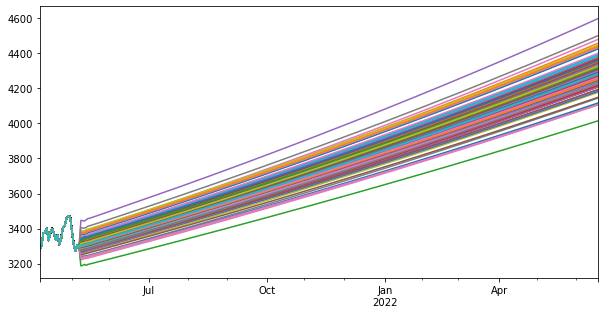

In [30]:
all_sims_df.plot(legend=False)

<AxesSubplot:>

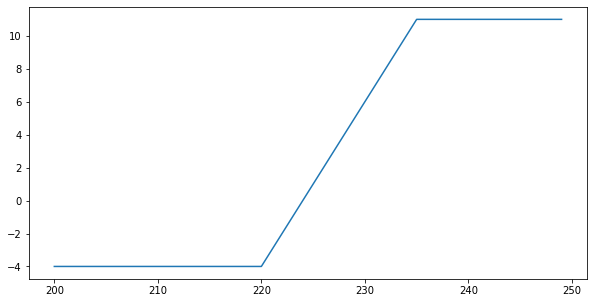

In [31]:
# Bull call spread strategy testing
current_price = 220
prices_at_expiration = np.arange(200, 250)
premium_long = 12
premium_short = 8
strike_long = 220
strike_short = 235
payoffs = pd.Series(prices_at_expiration, index=prices_at_expiration).apply(
    bull_call_spread_strategy, 
    args=(current_price, premium_short, premium_long, strike_short, strike_long)
)
payoffs.plot()

<AxesSubplot:>

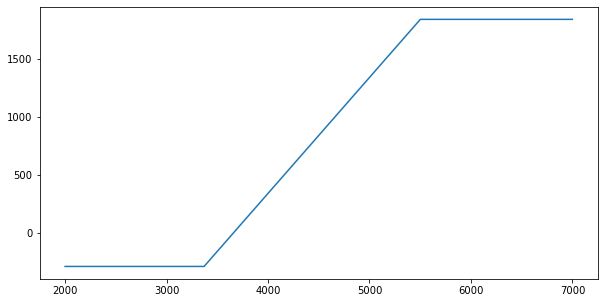

In [32]:
# Bull call spread strategy testing (with actual values)
current_price = amzn_history_close.loc['2021-05-07']
prices_at_expiration = np.arange(2000, 7000)
premium_long = amzn_long_call_ask
premium_short = amzn_short_call_bid
strike_long = amzn_long_call_strike
strike_short = amzn_short_call_strike
payoffs = pd.Series(prices_at_expiration, index=prices_at_expiration).apply(
    bull_call_spread_strategy, 
    args=(current_price, premium_short, premium_long, strike_short, strike_long)
)
payoffs.plot()

In [33]:
cc_payoffs_series = pd.Series(amzn_payoffs)
cc_payoffs_series.describe()

count    1000.000000
mean      619.800653
std        35.332602
min       353.930140
25%       602.550529
50%       620.319931
75%       630.487798
max       936.647431
dtype: float64

<AxesSubplot:>

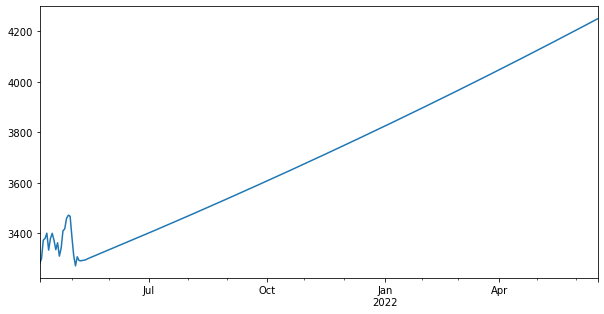

In [34]:
actual_underlying = amzn_forecasts[5]
actual_underlying.plot()

<AxesSubplot:>

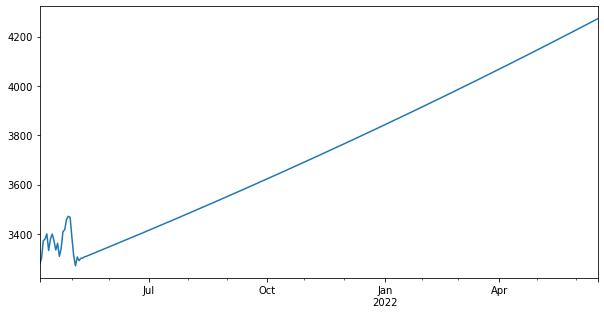

In [35]:
actual_underlying_two = amzn_forecasts[6]
actual_underlying_two.plot()

In [36]:
actual_underlying['2022-06-17']

4250.0306381677065

In [37]:
actual_underlying_two['2022-06-17']

4272.261915738654

In [38]:
actual_payoff = amzn_payoffs[5]
actual_payoff

590.0806381677064

In [39]:
actual_payoff_two = amzn_payoffs[6]
actual_payoff_two

612.3119157386543